# Kendall's $τ$ (tau)

Kendall's $\tau$ is another non-parametric correlation measure, but instead of ranks it uses pairwise concordance.
- Pairwise concordance means for every possible pair of data points you classify them as concordant if they move in the same direction, and discordant if they move in different directions. So:
  - Concordant pairs move in the same direction:
    - $x_{i} < x_{j}$, and $y_{i} < y_{j}$, $x_{i} > x_{j}$, and $y_{i} > y_{j}$
  - Discordant pairs move in opposite directions:
    - $x_{i} < x_{j}$, and $y_{i} > y_{j}$, $x_{i} > x_{j}$, and $y_{i} < y_{j}$

Kendall's $\tau$ is ideal for smaller sample sizes, and is better about handling tied ranks than Spearman's $\rho$.

Think of it as estimating the difference in probability that two variables are in the same order versus the opposite order.

__Assumptions__
1. At least ordinal level data.
2. Monotonic relationship.

As you can see again, linearity and approximate normality are not required for the data set.

$$
\tau = \frac{\text{# concordant pairs} - \text{# discordant pairs}}{\binom{n}{2}}
$$
- $\binom{n}{2}$ is the number of unique pairs. You can also represent it as $\frac{n(n-1)}{2}$

__How to Interpret__

| τ Value Range         | Description               |
| --------------------- | ------------------------- |
| $\tau = 0$            | No association            |
| $0 < \tau < 0.3$      | Weak positive association |
| $-0.3 < \tau < 0$     | Weak negative association |
| $0.3 \leq \tau < 0.7$ | Moderate association      |
| $\tau \geq 0.7$       | Strong association        |

## Python Code Example

In [2]:
# Import
import numpy as np
import pandas as pd

# Correlation coefficient
import scipy.stats as stats

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load Planets dataset from Seaborn - drop missing variables and choose a smaller sample
planets = sns.load_dataset('planets').dropna().sample(100, random_state=42)
df = pd.DataFrame(planets)

# View some details
df.head()

,method,number,orbital_period,mass,distance,year
632,Radial Velocity,3,8.1352,0.0360,25.87,2011
142,Radial Velocity,4,61.1166,2.2756,4.70,1998
351,Radial Velocity,1,6.2760,1.9000,58.82,2001
294,Radial Velocity,1,388.0000,9.1000,20.98,2005
358,Radial Velocity,1,1260.0000,3.0600,53.05,2008


In [4]:
# Skew and kurtosis
pd.DataFrame(data={'skew': df.iloc[:, 2:5].skew(), 'kurtosis': df.iloc[:, 2:5].kurtosis()}).style.background_gradient(cmap='coolwarm')

,skew,kurtosis
orbital_period,6.755347,55.439942
mass,2.016572,3.960250
distance,2.960721,10.280670


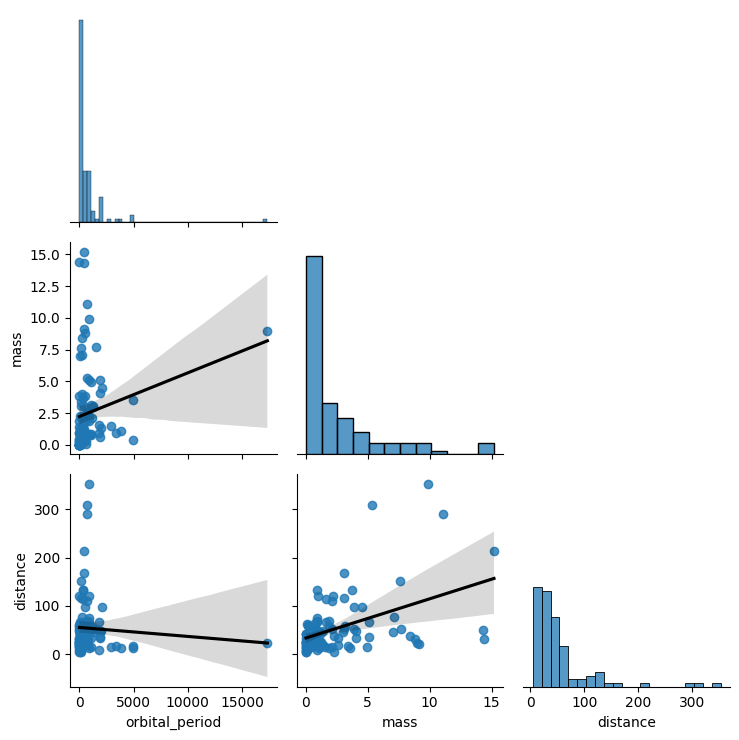

In [5]:
# Pairplot
sns.pairplot(df.iloc[:, 2:5], corner=True, kind='reg', plot_kws={'line_kws': {'color': 'black'}})

plt.tight_layout()
plt.show()

In [6]:
### Calculate Kendall's tau individuall
for col in df.iloc[:, 2:5].columns:
  # Exclude orbital_period
  if col != 'orbital_period':
    # Calculate Kendall's tau
    tau, p = stats.kendalltau(df['orbital_period'], df[col])
    # Output display
    print(f'Kendall\'s tau between Orbital Period and {col}: {round(tau,2)} | p-value: {p}')

Kendall's tau between Orbital Period and mass: 0.35 | p-value: 3.5840403947937143e-07
Kendall's tau between Orbital Period and distance: 0.12 | p-value: 0.08302418600209442


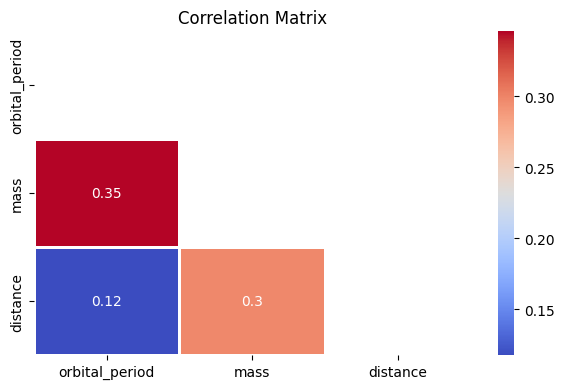

In [7]:
### Seaborn heatmap version
planets_corr = df.iloc[:, 2:5].corr(method='kendall')

mask = np.triu(np.ones_like(planets_corr, dtype=bool))

plt.figure(figsize=(6,4))
sns.heatmap(planets_corr, mask=mask, annot=True, fmt='.2g', cmap='coolwarm', linewidths=1)
plt.title('Correlation Matrix')
plt.tight_layout()

<a id='distance'></a>